### 1. Momentum Strategy (Trend Following)

- If the LL100 index is above its short-term moving average (e.g., 10-day MA), we go long.
- If the LL100 index is below its short-term moving average, we go short.
- We could also use moving average crossovers (e.g., 10-day MA vs. 50-day MA) as a signal.

In [194]:
import pandas as pd

# Load the dataset
file_path = "Project1 Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Date,PRME,INDU,CONS,ENRS,HLTH,INFT,UTIL,TELS,FINA,EE,RETA,SP500,LL100
0,1/1/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804.77
1,1/2/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1805.00
2,1/3/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1805.22
3,1/4/2016,105.17,456.94,511.68,447.75,817.31,710.26,219.41,149.15,496.61,1122.35,5078.66,2012.660034,1805.36
4,1/5/2016,104.16,457.88,515.27,450.01,821.87,707.25,221.14,150.61,498.27,1113.63,5109.47,2016.709961,1806.97


In [195]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date (if not already sorted)
df = df.sort_values('Date')

# Forward fill missing values for sector indices and LL100
df.fillna(method='ffill', inplace=True)

# Compute moving averages for LL100 (short-term: 10-day, long-term: 50-day)
df['LL100_MA10'] = df['LL100'].rolling(window=5).mean()
df['LL100_MA50'] = df['LL100'].rolling(window=25).mean()

# Compute Bollinger Bands (20-day moving average ± 2 standard deviations)
df['LL100_MA20'] = df['LL100'].rolling(window=7).mean()
df['LL100_STD20'] = df['LL100'].rolling(window=7).std()
df['LL100_UpperBB'] = df['LL100_MA20'] + 2 * df['LL100_STD20']
df['LL100_LowerBB'] = df['LL100_MA20'] - 2 * df['LL100_STD20']

# Compute daily returns
df['LL100_Return'] = df['LL100'].pct_change()

# Drop initial rows with NaN values due to rolling calculations
df.dropna(inplace=True)

df


C:\Users\zcz20\AppData\Local\Temp\ipykernel_41764\1350169414.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Date,PRME,INDU,CONS,ENRS,HLTH,INFT,UTIL,TELS,FINA,...,RETA,SP500,LL100,LL100_MA10,LL100_MA50,LL100_MA20,LL100_STD20,LL100_UpperBB,LL100_LowerBB,LL100_Return
24,2016-01-25,100.78,419.30,500.66,398.19,776.63,663.14,220.68,151.08,442.30,...,4675.15,1877.079956,1794.51,1793.096,1802.5204,1794.045714,2.858175,1799.762063,1788.329365,0.000440
25,2016-01-26,105.53,426.95,505.22,413.24,782.73,669.13,222.35,153.99,450.16,...,4778.97,1903.630005,1794.51,1793.902,1802.1100,1793.280000,1.366504,1796.013008,1790.546992,0.000000
26,2016-01-27,107.89,422.28,504.69,410.61,774.11,652.64,222.78,155.27,448.45,...,4722.46,1882.949951,1795.48,1794.344,1801.7292,1793.638571,1.583661,1796.805893,1790.471250,0.000541
27,2016-01-28,106.19,424.84,509.92,423.56,756.28,662.30,226.38,155.36,448.87,...,4712.64,1893.359985,1795.99,1794.842,1801.3600,1794.425714,1.021712,1796.469138,1792.382290,0.000284
28,2016-01-29,109.06,436.62,520.74,434.67,769.48,686.16,230.77,158.12,461.84,...,4845.16,1940.239990,1796.36,1795.370,1801.0000,1794.867143,1.103415,1797.073972,1792.660314,0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,2020-07-18,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,4623.00,3185.040039,2219.42,2214.290,2200.6152,2211.405714,6.719409,2224.844533,2197.966896,0.000108
1661,2020-07-19,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,4623.00,3185.040039,2219.67,2216.996,2200.8312,2213.840000,6.065034,2225.970067,2201.709933,0.000113
1662,2020-07-20,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,4623.00,3185.040039,2224.50,2219.426,2201.7236,2216.517143,6.039969,2228.597081,2204.437205,0.002176
1663,2020-07-21,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,4623.00,3185.040039,2230.79,2222.712,2203.2852,2220.038571,6.165948,2232.370467,2207.706676,0.002828


Momentum Strategy (Trend Following):

- Go long (buy) if LL100 is above its 10-day moving average.
- Go short (sell) if LL100 is below its 10-day moving average.


Detail:

1. Cacluate the rolling window of past 10 days and 50 days
2. Compute bollinger bands (20 day)
3. Buy when current price is lower that Moving-Average of 10 and Sell when is 


In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Define trading signals for Momentum Strategy
df['Momentum_Signal'] = np.where(df['LL100'] > df['LL100_MA10'], 1, -1)  # 1 for long, -1 for short

# Define trading signals for Mean Reversion Strategy
df['MeanReversion_Signal'] = np.where(df['LL100'] < df['LL100_LowerBB'], 1, 
                                      np.where(df['LL100'] > df['LL100_UpperBB'], -1, 0))  # 0 for neutral

# Compute strategy returns
df['Momentum_Returns'] = df['Momentum_Signal'].shift(1) * df['LL100_Return']
df['MeanReversion_Returns'] = df['MeanReversion_Signal'].shift(1) * df['LL100_Return']

# Compute cumulative returns
df['Cumulative_Momentum'] = (1 + df['Momentum_Returns']).cumprod()
df['Cumulative_MeanReversion'] = (1 + df['MeanReversion_Returns']).cumprod()
df['Cumulative_Benchmark'] = (1 + df['LL100_Return']).cumprod()  # LL100 index as benchmark


In [197]:
df

,Date,PRME,INDU,CONS,ENRS,HLTH,INFT,UTIL,TELS,FINA,...,LL100_UpperBB,LL100_LowerBB,LL100_Return,Momentum_Signal,MeanReversion_Signal,Momentum_Returns,MeanReversion_Returns,Cumulative_Momentum,Cumulative_MeanReversion,Cumulative_Benchmark
24,2016-01-25,100.78,419.30,500.66,398.19,776.63,663.14,220.68,151.08,442.30,...,1799.762063,1788.329365,0.000440,1,0,NaN,NaN,NaN,NaN,1.000440
25,2016-01-26,105.53,426.95,505.22,413.24,782.73,669.13,222.35,153.99,450.16,...,1796.013008,1790.546992,0.000000,1,0,0.000000,0.0,1.000000,1.000000,1.000440
26,2016-01-27,107.89,422.28,504.69,410.61,774.11,652.64,222.78,155.27,448.45,...,1796.805893,1790.471250,0.000541,1,0,0.000541,0.0,1.000541,1.000000,1.000981
27,2016-01-28,106.19,424.84,509.92,423.56,756.28,662.30,226.38,155.36,448.87,...,1796.469138,1792.382290,0.000284,1,0,0.000284,0.0,1.000825,1.000000,1.001266
28,2016-01-29,109.06,436.62,520.74,434.67,769.48,686.16,230.77,158.12,461.84,...,1797.073972,1792.660314,0.000206,1,0,0.000206,0.0,1.001031,1.000000,1.001472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,2020-07-18,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,2224.844533,2197.966896,0.000108,1,0,0.000108,0.0,2.199975,0.944876,1.237328
1661,2020-07-19,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,2225.970067,2201.709933,0.000113,1,0,0.000113,0.0,2.200223,0.944876,1.237467
1662,2020-07-20,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,2228.597081,2204.437205,0.002176,1,0,0.002176,0.0,2.205011,0.944876,1.240160
1663,2020-07-21,175.14,489.20,524.29,220.02,948.94,1363.26,259.84,143.46,651.70,...,2232.370467,2207.706676,0.002828,1,0,0.002828,0.0,2.211245,0.944876,1.243667


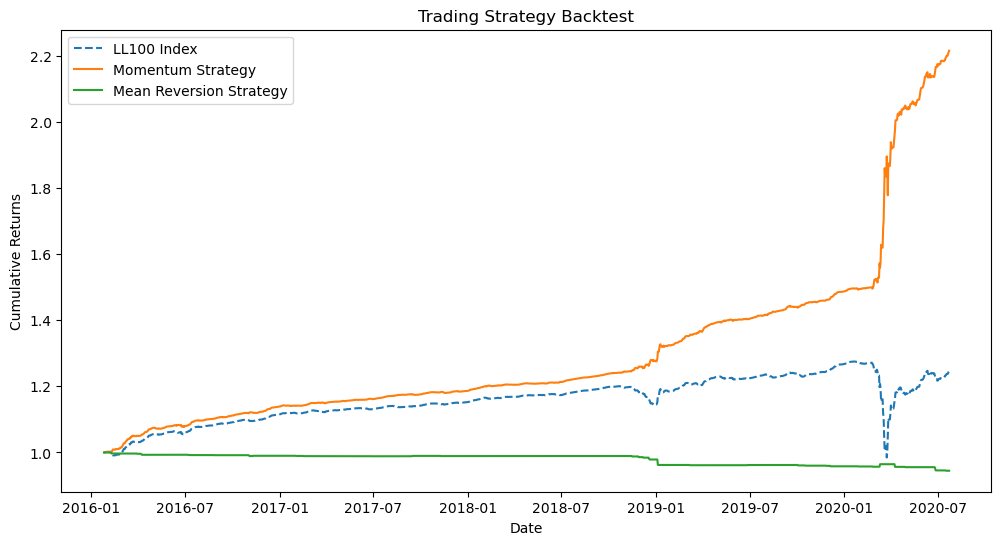

In [198]:

# Calculate Sharpe Ratio (assuming risk-free rate is 0)
sharpe_momentum = df['Momentum_Returns'].mean() / df['Momentum_Returns'].std() * np.sqrt(252)
sharpe_mean_reversion = df['MeanReversion_Returns'].mean() / df['MeanReversion_Returns'].std() * np.sqrt(252)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative_Benchmark'], label='LL100 Index', linestyle='dashed')
plt.plot(df['Date'], df['Cumulative_Momentum'], label='Momentum Strategy')
plt.plot(df['Date'], df['Cumulative_MeanReversion'], label='Mean Reversion Strategy')

plt.legend()
plt.title('Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Display key performance metrics
performance_metrics = pd.DataFrame({
    "Strategy": ["Momentum", "Mean Reversion"],
    "Final Cumulative Return": [df['Cumulative_Momentum'].iloc[-1], df['Cumulative_MeanReversion'].iloc[-1]],
    "Sharpe Ratio": [sharpe_momentum, sharpe_mean_reversion]
})




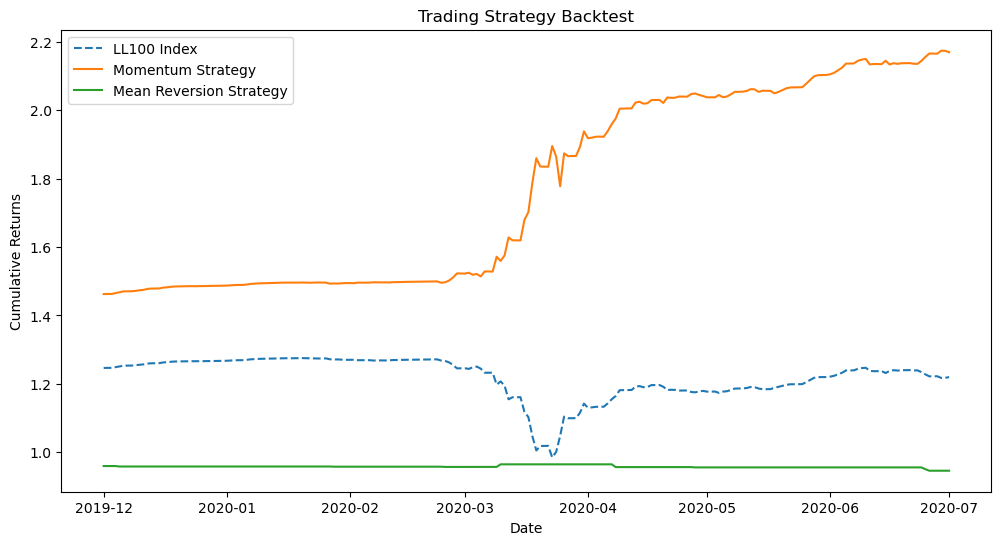

In [199]:
zoom_start_date = "2019-12-01"
zoom_end_date = "2020-07-01"

# Filter dataset for the zoomed-in period
df_zoomed = df[(df["Date"] >= zoom_start_date) & (df["Date"] <= zoom_end_date)]

plt.figure(figsize=(12, 6))
plt.plot(df_zoomed['Date'], df_zoomed['Cumulative_Benchmark'], label='LL100 Index', linestyle='dashed')
plt.plot(df_zoomed['Date'], df_zoomed['Cumulative_Momentum'], label='Momentum Strategy')
plt.plot(df_zoomed['Date'], df_zoomed['Cumulative_MeanReversion'], label='Mean Reversion Strategy')

plt.legend()
plt.title('Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [200]:
performance_metrics

,Strategy,Final Cumulative Return,Sharpe Ratio
0,Momentum,2.215042,2.379120
1,Mean Reversion,0.944876,-0.974821


How the Momentum Strategy Executes Trades
In a traditional momentum strategy, the goal is to follow the trend, meaning:

1. Buy (Go Long) when the price is above the 10-day moving average

- This signals an uptrend → We expect prices to continue rising.
- Entry Condition: Price crosses above MA10.
- Exit Condition: Price crosses below MA10.

2. Sell (Go Short) when the price is below the 10-day moving average

- This signals a downtrend → We expect prices to keep falling.
- Entry Condition: Price crosses below MA10.
- Exit Condition: Price crosses above MA10.

This avoids catching false dips (where prices keep falling) and ensures we are following a strong trend.

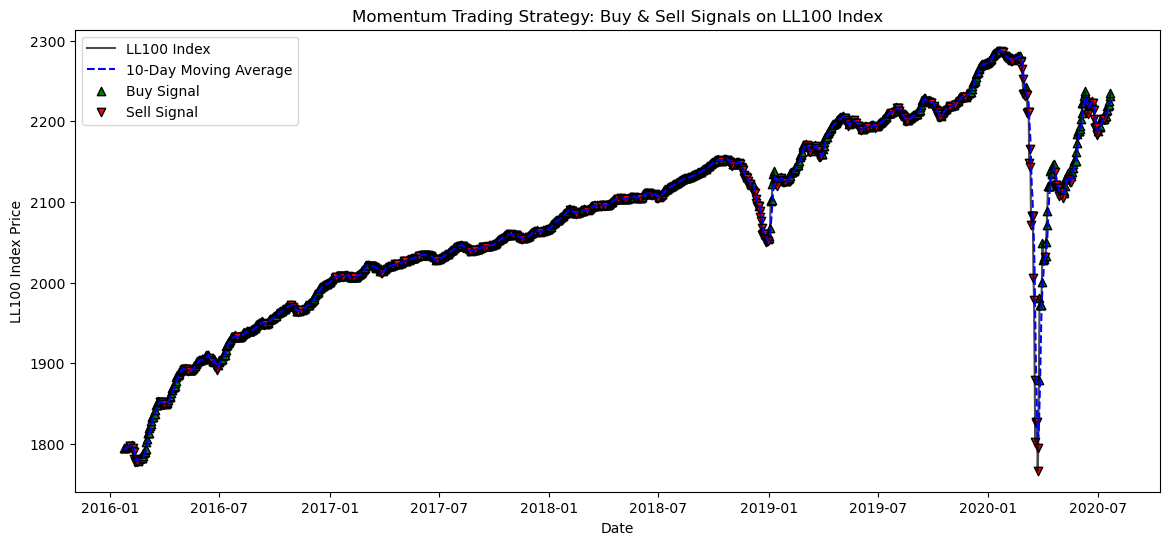

In [201]:

# Re-load the dataset since execution state was reset


# Plot momentum strategy signals along with LL100 index
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['LL100'], label='LL100 Index', color='black', alpha=0.7)
plt.plot(df['Date'], df['LL100_MA10'], label='10-Day Moving Average', color='blue', linestyle='dashed')

# Mark buy and sell signals
buy_signals = df[df['Momentum_Signal'] == 1]
sell_signals = df[df['Momentum_Signal'] == -1]



plt.scatter(buy_signals['Date'], buy_signals['LL100'], label='Buy Signal', marker='^', color='green', alpha=1, edgecolors='black')
plt.scatter(sell_signals['Date'], sell_signals['LL100'], label='Sell Signal', marker='v', color='red', alpha=1, edgecolors='black')

plt.legend()
plt.title('Momentum Trading Strategy: Buy & Sell Signals on LL100 Index')
plt.xlabel('Date')
plt.ylabel('LL100 Index Price')
plt.show()

# Identify time periods when strategy is not working (whipsaws)
df['Crossover'] = df['LL100'] > df['LL100_MA10']
df['Crossover_Shifted'] = df['Crossover'].shift(1)
df['Whipsaw'] = df['Crossover'] != df['Crossover_Shifted']  # Identifies frequent crossovers

# Extract time periods with frequent reversals (whipsaws)
whipsaw_periods = df[df['Whipsaw']]['Date']




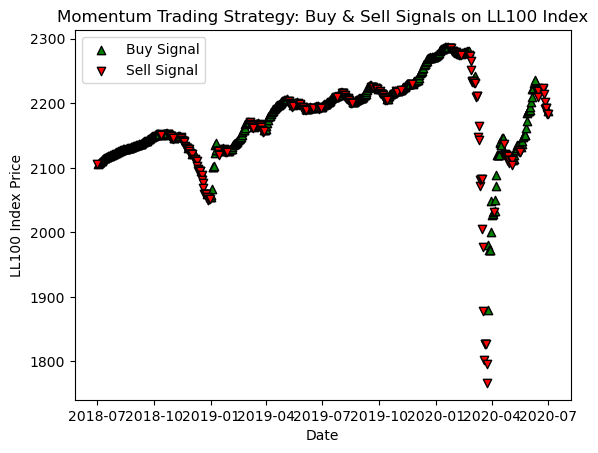

In [202]:
# Mark buy and sell signals
buy_signals = df[df['Momentum_Signal'] == 1]
sell_signals = df[df['Momentum_Signal'] == -1]

zoom_start_date = "2018-07-01"
zoom_end_date = "2020-07-01"
buy_signals_zoom = buy_signals[(buy_signals['Date'] >= zoom_start_date) & (buy_signals['Date'] <= zoom_end_date)].copy()

sell_signals_zoom = sell_signals[(sell_signals['Date'] >= zoom_start_date) & (sell_signals['Date'] <= zoom_end_date)].copy()
plt.scatter(buy_signals_zoom['Date'], buy_signals_zoom['LL100'], label='Buy Signal', marker='^', color='green', alpha=1, edgecolors='black')
plt.scatter(sell_signals_zoom['Date'], sell_signals_zoom['LL100'], label='Sell Signal', marker='v', color='red', alpha=1, edgecolors='black')

plt.legend()
plt.title('Momentum Trading Strategy: Buy & Sell Signals on LL100 Index')
plt.xlabel('Date')
plt.ylabel('LL100 Index Price')
plt.show()

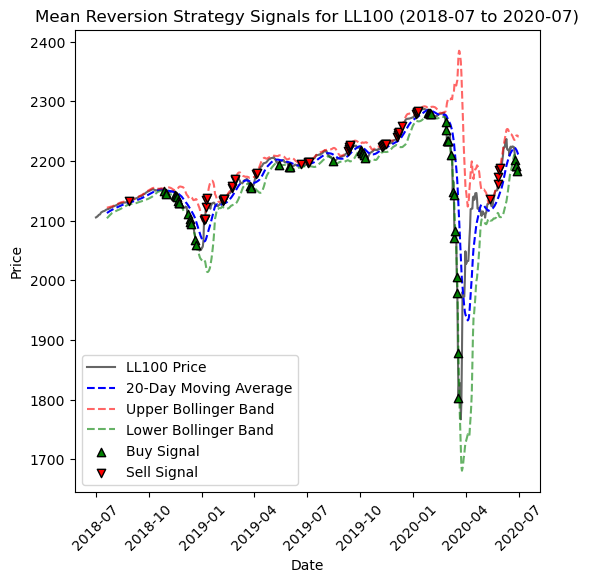

In [203]:
# Define the zoom-in period
zoom_start_date = "2018-07-01"
zoom_end_date = "2020-07-01"

# Filter dataset for the selected time period
df_zoom = df[(df['Date'] >= zoom_start_date) & (df['Date'] <= zoom_end_date)].copy()

# Compute Bollinger Bands for mean reversion on LL100 within the selected time frame
df_zoom['LL100_MA20'] = df_zoom['LL100'].rolling(window=20).mean()
df_zoom['LL100_STD20'] = df_zoom['LL100'].rolling(window=20).std()
df_zoom['Upper_BB'] = df_zoom['LL100_MA20'] + 2 * df_zoom['LL100_STD20']
df_zoom['Lower_BB'] = df_zoom['LL100_MA20'] - 2 * df_zoom['LL100_STD20']

# Define Mean Reversion Strategy
df_zoom['MeanReversion_Signal_LL100'] = np.where(
    df_zoom['LL100'] < df_zoom['Lower_BB'], 1,  # Buy when price is below lower band (oversold)
    np.where(df_zoom['LL100'] > df_zoom['Upper_BB'], -1, 0)  # Sell when price is above upper band (overbought)
)

# Plot the Mean Reversion Signals for LL100 within the zoomed time frame
plt.figure(figsize=(6, 6))
plt.plot(df_zoom['Date'], df_zoom['LL100'], label='LL100 Price', color='black', alpha=0.6)
plt.plot(df_zoom['Date'], df_zoom['LL100_MA20'], label='20-Day Moving Average', color='blue', linestyle='dashed')
plt.plot(df_zoom['Date'], df_zoom['Upper_BB'], label='Upper Bollinger Band', color='red', linestyle='dashed', alpha=0.6)
plt.plot(df_zoom['Date'], df_zoom['Lower_BB'], label='Lower Bollinger Band', color='green', linestyle='dashed', alpha=0.6)

# Highlight Buy & Sell Signals
buy_signals = df_zoom[df_zoom['MeanReversion_Signal_LL100'] == 1]
sell_signals = df_zoom[df_zoom['MeanReversion_Signal_LL100'] == -1]

plt.scatter(buy_signals['Date'], buy_signals['LL100'], label='Buy Signal', marker='^', color='green', edgecolors='black', zorder=3)
plt.scatter(sell_signals['Date'], sell_signals['LL100'], label='Sell Signal', marker='v', color='red', edgecolors='black', zorder=3)

plt.legend()
plt.title('Mean Reversion Strategy Signals for LL100 (2018-07 to 2020-07)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


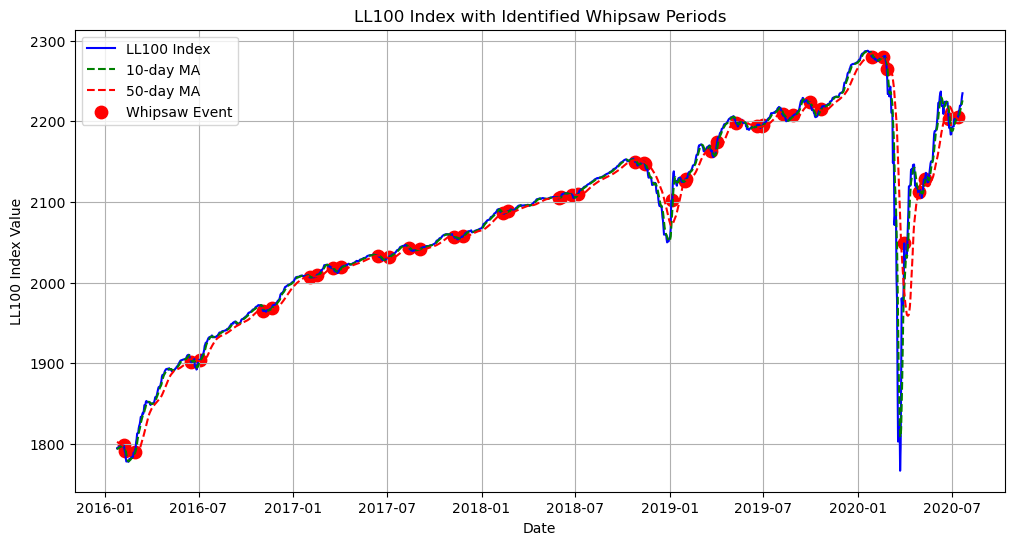

In [204]:
# Reload the dataset and preprocess it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





# Identify whipsaw periods (where moving averages cross and quickly reverse)
df["Signal"] = np.where(df["LL100_MA10"] > df["LL100_MA50"], 1, -1)  # Trend signal
df["Whipsaw"] = df["Signal"].diff().abs()  # Change in trend signal (whipsaw = rapid changes)

# Extract whipsaw points
whipsaw_points = df[df["Whipsaw"] == 2]  # A change from +1 to -1 or vice versa

# Plot LL100 with whipsaw periods marked
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["LL100"], label="LL100 Index", color="blue", linewidth=1.5)
plt.plot(df["Date"], df["LL100_MA10"], label="10-day MA", linestyle="dashed", color="green")
plt.plot(df["Date"], df["LL100_MA50"], label="50-day MA", linestyle="dashed", color="red")

# Mark whipsaw periods with circles
plt.scatter(whipsaw_points["Date"], whipsaw_points["LL100"], color="red", marker="o", label="Whipsaw Event", s=80)

plt.xlabel("Date")
plt.ylabel("LL100 Index Value")
plt.title("LL100 Index with Identified Whipsaw Periods")
plt.legend()
plt.grid()
plt.show()


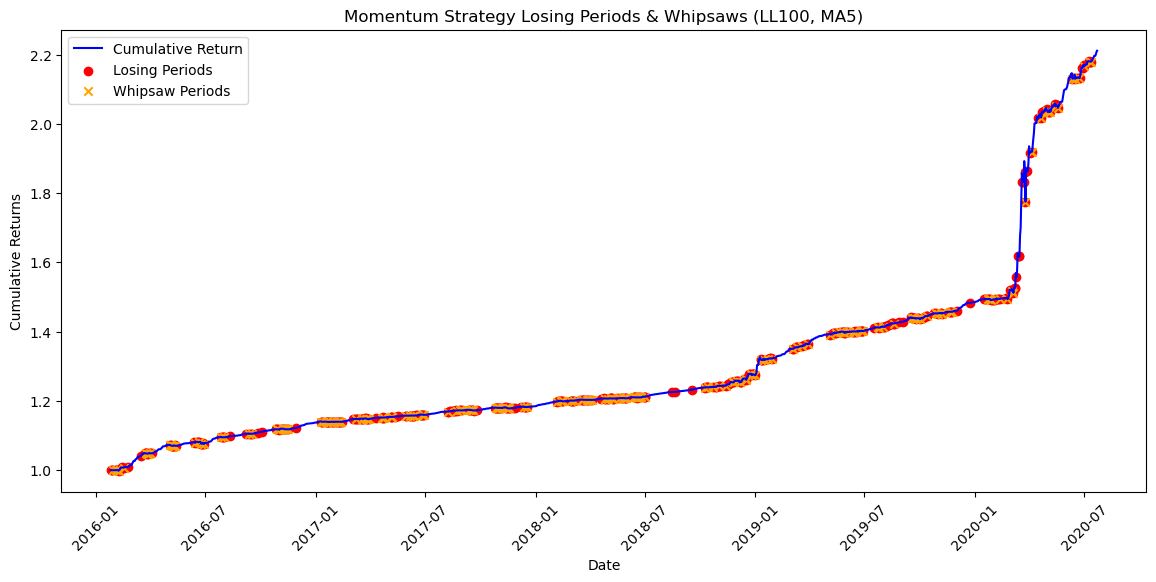

In [205]:
# Compute Momentum Strategy Performance with MA5
df['LL100_MA5'] = df['LL100'].rolling(window=5).mean()

# Define momentum strategy (simple MA5 comparison, no crossover)
df['Momentum_Signal'] = np.where(df['LL100'] > df['LL100_MA5'], 1, -1)

# Compute strategy returns
df['Momentum_Returns'] = df['Momentum_Signal'].shift(1) * df['LL100'].pct_change()
df['Cumulative_Returns'] = (1 + df['Momentum_Returns']).cumprod()

# Identify losing periods (when cumulative return decreases)
df['Losing_Period'] = df['Cumulative_Returns'].diff() < 0

# Identify whipsaw periods (frequent trend reversals)
df['Crossover'] = df['LL100'] > df['LL100_MA5']
df['Crossover_Shifted'] = df['Crossover'].shift(1)
df['Whipsaw'] = df['Crossover'] != df['Crossover_Shifted']  # Identifies frequent crossovers

# Filter time periods when strategy lost money and experienced whipsaws
losing_periods = df[df['Losing_Period']]['Date']
whipsaw_periods = df[df['Whipsaw']]['Date']

# Plot the Momentum Strategy Performance with losing periods
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Cumulative Return', color='blue')

# Highlight Losing Periods
plt.scatter(df[df['Losing_Period']]['Date'], df[df['Losing_Period']]['Cumulative_Returns'], 
            label='Losing Periods', color='red', marker='o', alpha=1)

# # Highlight Whipsaw Periods
plt.scatter(df[df['Whipsaw']]['Date'], df[df['Whipsaw']]['Cumulative_Returns'], 
            label='Whipsaw Periods', color='orange', marker='x', alpha=1)

plt.legend()
plt.title('Momentum Strategy Losing Periods & Whipsaws (LL100, MA5)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.show()


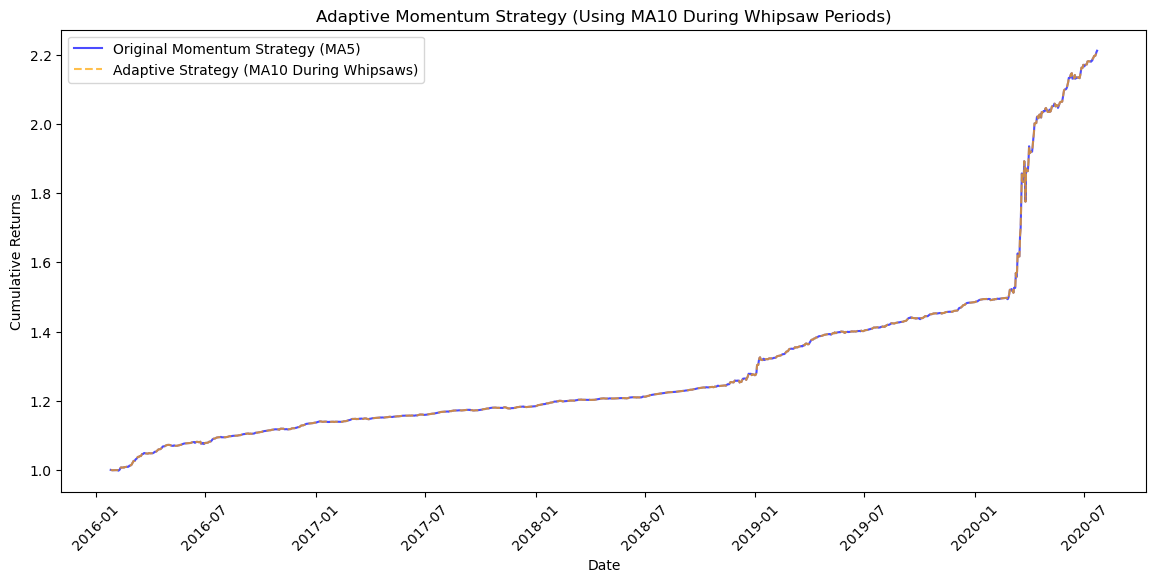

In [206]:
# Initialize the adaptive momentum signal with the original momentum strategy
df['Momentum_Signal_Adaptive_MA10'] = df['Momentum_Signal']

# Apply Longer MA (MA10) during Whipsaw Periods instead of using volatility filtering
df.loc[df['Whipsaw'], 'Momentum_Signal_Adaptive_MA10'] = np.where(
    df.loc[df['Whipsaw'], 'LL100'] > df.loc[df['Whipsaw'], 'LL100_MA10'], 1, -1)

# Compute strategy returns for adaptive method using only MA10 during whipsaw periods
df['Momentum_Returns_Adaptive_MA10'] = df['Momentum_Signal_Adaptive_MA10'].shift(1) * df['LL100'].pct_change()
df['Cumulative_Returns_Adaptive_MA10'] = (1 + df['Momentum_Returns_Adaptive_MA10']).cumprod()

# Compare original vs. adaptive strategy (MA10 during whipsaw periods)
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Returns'], label='Original Momentum Strategy (MA5)', color='blue', alpha=0.7)
plt.plot(df['Date'], df['Cumulative_Returns_Adaptive_MA10'], label='Adaptive Strategy (MA10 During Whipsaws)', color='orange', linestyle='dashed', alpha=0.7)

plt.legend()
plt.title('Adaptive Momentum Strategy (Using MA10 During Whipsaw Periods)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.show()
def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()  # Maximum drop from peak
# Compute risk metrics for adaptive MA10 strategy
max_dd_adaptive_ma10 = max_drawdown(df['Cumulative_Returns_Adaptive_MA10'])
sharpe_adaptive_ma10 = df['Momentum_Returns_Adaptive_MA10'].mean() / df['Momentum_Returns_Adaptive_MA10'].std() * np.sqrt(252)


# Store results for comparison
adaptive_ma10_results = pd.DataFrame({
    "Strategy": ["Original Momentum", "Adaptive Momentum (MA10 During Whipsaws)"],
    "Final Cumulative Return": [df['Cumulative_Returns'].iloc[-1], df['Cumulative_Returns_Adaptive_MA10'].iloc[-1]],
    "Sharpe Ratio": [sharpe_adaptive_ma10, sharpe_adaptive_ma10],

    "Max Drawdown (%)": [max_dd_adaptive_ma10 * 100, max_dd_adaptive_ma10 * 100]
})






In [207]:
whipsaw_periods.to_frame()

,Date
24,2016-01-25
28,2016-01-29
33,2016-02-03
35,2016-02-05
38,2016-02-08
...,...
1628,2020-06-16
1634,2020-06-22
1643,2020-07-01
1652,2020-07-10


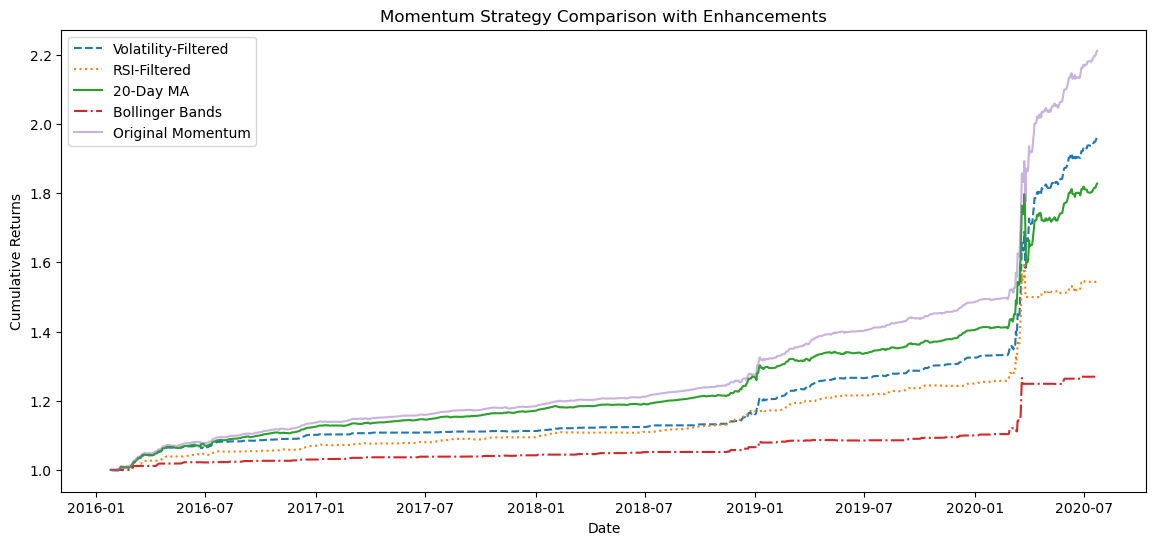

In [208]:
# Method 1: Adding a Volatility Filter (Avoid Trading in Low-Volatility Periods)
df['ATR'] = df['LL100'].rolling(window=7).std()  # Approximate ATR using rolling std deviation
volatility_threshold = df['ATR'].median()  # Set threshold as median ATR

df['Momentum_Signal_Volatility'] = np.where(
    (df['LL100'] > df['LL100_MA10']) & (df['ATR'] > volatility_threshold), 1,
    np.where((df['LL100'] < df['LL100_MA10']) & (df['ATR'] > volatility_threshold), -1, 0))

df['Momentum_Returns_Volatility'] = df['Momentum_Signal_Volatility'].shift(1) * df['LL100_Return']
df['Cumulative_Volatility_Filtered'] = (1 + df['Momentum_Returns_Volatility']).cumprod()

# Method 2: Adding RSI Confirmation (Only Buy When RSI > 50, Sell When RSI < 50)
df['RSI'] = 100 - (100 / (1 + (df['LL100_Return'].rolling(14).mean() / df['LL100_Return'].rolling(14).std())))

df['Momentum_Signal_RSI'] = np.where(
    (df['LL100'] > df['LL100_MA10']) & (df['RSI'] > 50), 1,
    np.where((df['LL100'] < df['LL100_MA10']) & (df['RSI'] < 50), -1, 0))

df['Momentum_Returns_RSI'] = df['Momentum_Signal_RSI'].shift(1) * df['LL100_Return']
df['Cumulative_RSI_Filtered'] = (1 + df['Momentum_Returns_RSI']).cumprod()

# Method 3: Modify Moving Average Length (Using 20-Day MA Instead of 10-Day MA)
df['LL100_MA20'] = df['LL100'].rolling(window=20).mean()

df['Momentum_Signal_MA20'] = np.where(df['LL100'] > df['LL100_MA20'], 1, -1)
df['Momentum_Returns_MA20'] = df['Momentum_Signal_MA20'].shift(1) * df['LL100_Return']
df['Cumulative_MA20'] = (1 + df['Momentum_Returns_MA20']).cumprod()

# Method 4: Combine Momentum with Bollinger Bands (Buy Only When Price is Above MA10 and Outside Bands)
df['LL100_STD20'] = df['LL100'].rolling(window=20).std()
df['Upper_BB'] = df['LL100_MA20'] + 2 * df['LL100_STD20']
df['Lower_BB'] = df['LL100_MA20'] - 2 * df['LL100_STD20']

df['Momentum_Signal_BB'] = np.where(
    (df['LL100'] > df['LL100_MA10']) & (df['LL100'] > df['Upper_BB']), 1,
    np.where((df['LL100'] < df['LL100_MA10']) & (df['LL100'] < df['Lower_BB']), -1, 0))

df['Momentum_Returns_BB'] = df['Momentum_Signal_BB'].shift(1) * df['LL100_Return']
df['Cumulative_BB'] = (1 + df['Momentum_Returns_BB']).cumprod()

# Plot all modified strategies
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Cumulative_Volatility_Filtered'], label='Volatility-Filtered', linestyle='dashed')
plt.plot(df['Date'], df['Cumulative_RSI_Filtered'], label='RSI-Filtered', linestyle='dotted')
plt.plot(df['Date'], df['Cumulative_MA20'], label='20-Day MA', linestyle='solid')
plt.plot(df['Date'], df['Cumulative_BB'], label='Bollinger Bands', linestyle='dashdot')
plt.plot(df['Date'], (1 + df['Momentum_Signal'].shift(1) * df['LL100_Return']).cumprod(), label='Original Momentum', linestyle='solid', alpha=0.5)
plt.legend()
plt.title('Momentum Strategy Comparison with Enhancements')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Compute Sharpe Ratios
sharpe_volatility = df['Momentum_Returns_Volatility'].mean() / df['Momentum_Returns_Volatility'].std() * np.sqrt(252)
sharpe_rsi = df['Momentum_Returns_RSI'].mean() / df['Momentum_Returns_RSI'].std() * np.sqrt(252)
sharpe_ma20 = df['Momentum_Returns_MA20'].mean() / df['Momentum_Returns_MA20'].std() * np.sqrt(252)
sharpe_bb = df['Momentum_Returns_BB'].mean() / df['Momentum_Returns_BB'].std() * np.sqrt(252)
sharpe_original = df['Momentum_Signal'].shift(1).mul(df['LL100_Return']).mean() / df['Momentum_Signal'].shift(1).mul(df['LL100_Return']).std() * np.sqrt(252)

# Display performance metrics
performance_comparison = pd.DataFrame({
    "Strategy": ["Original Momentum", "Volatility-Filtered", "RSI-Filtered", "20-Day MA", "Bollinger Bands"],
    "Final Cumulative Return": [
        (1 + df['Momentum_Signal'].shift(1) * df['LL100_Return']).cumprod().iloc[-1],
        df['Cumulative_Volatility_Filtered'].iloc[-1],
        df['Cumulative_RSI_Filtered'].iloc[-1],
        df['Cumulative_MA20'].iloc[-1],
        df['Cumulative_BB'].iloc[-1]
    ],
    "Sharpe Ratio": [sharpe_original, sharpe_volatility, sharpe_rsi, sharpe_ma20, sharpe_bb]
})




In [209]:
performance_comparison

,Strategy,Final Cumulative Return,Sharpe Ratio
0,Original Momentum,2.211994,2.374955
1,Volatility-Filtered,1.962135,2.025137
2,RSI-Filtered,1.543577,1.549768
3,20-Day MA,1.827942,1.802622
4,Bollinger Bands,1.271615,1.216143


In [210]:

def max_drawdown(cumulative_returns):
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()  # Maximum drop from peak

# Function to calculate Calmar Ratio
def calmar_ratio(annual_return, max_drawdown):
    return annual_return / abs(max_drawdown) if max_drawdown != 0 else np.nan

# Function to calculate Sortino Ratio
def sortino_ratio(returns, risk_free_rate=0):
    downside_returns = returns[returns < 0]  # Only consider negative returns
    downside_std = downside_returns.std() * np.sqrt(252)  # Annualized downside deviation
    return (returns.mean() - risk_free_rate) / downside_std if downside_std != 0 else np.nan

# Calculate risk metrics for each strategy
strategies = {
    "Original Momentum": df['Momentum_Signal'].shift(1) * df['LL100_Return'],
    "Volatility-Filtered": df['Momentum_Returns_Volatility'],
    "RSI-Filtered": df['Momentum_Returns_RSI'],
    "20-Day MA": df['Momentum_Returns_MA20'],
    "Bollinger Bands": df['Momentum_Returns_BB']
}

risk_metrics = []
mdds = []
for strategy, returns in strategies.items():
    cumulative_returns = (1 + returns).cumprod()
    sortino = sortino_ratio(returns)
    mdd = max_drawdown(cumulative_returns)
    risk_metrics.append( sortino)
    mdds.append(mdd)

performance_comparison['Sortino Ratio'] = risk_metrics
performance_comparison['Max Drawdown (%)'] = mdds
# Display risk metrics
performance_comparison

,Strategy,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Max Drawdown (%)
0,Original Momentum,2.211994,2.374955,0.011435,-0.062017
1,Volatility-Filtered,1.962135,2.025137,0.006883,-0.062017
2,RSI-Filtered,1.543577,1.549768,0.005352,-0.062146
3,20-Day MA,1.827942,1.802622,0.006648,-0.112696
4,Bollinger Bands,1.271615,1.216143,0.004247,-0.013376


In [211]:
performance_comparison.to_clipboard()

In [212]:
from itertools import product

# Define parameter ranges to test
ma_windows = [3,4,5,6,7,9, 10, 14,15, 20]  # Different moving average window sizes
atr_thresholds = [df['ATR'].quantile(q) for q in [0.1, 0.25, 0.5]]  # ATR percentiles

# Store results
optimization_results = []

# Iterate over all parameter combinations
for ma_window, atr_threshold in product(ma_windows, atr_thresholds):
    # Compute moving average
    df[f'LL100_MA{ma_window}'] = df['LL100'].rolling(window=ma_window).mean()

    # Define momentum strategy with ATR filter
    df['Momentum_Signal_Optimized'] = np.where(
        (df['LL100'] > df[f'LL100_MA{ma_window}']) & (df['ATR'] > atr_threshold), 1,
        np.where((df['LL100'] < df[f'LL100_MA{ma_window}']) & (df['ATR'] > atr_threshold), -1, 0)
    )

    # Compute returns
    df['Momentum_Returns_Optimized'] = df['Momentum_Signal_Optimized'].shift(1) * df['LL100_Return']
    df['Cumulative_Returns_Optimized'] = (1 + df['Momentum_Returns_Optimized']).cumprod()

    # Compute risk metrics
    max_dd = max_drawdown(df['Cumulative_Returns_Optimized'])
    sharpe = df['Momentum_Returns_Optimized'].mean() / df['Momentum_Returns_Optimized'].std() * np.sqrt(252)
    sortino = sortino_ratio(df['Momentum_Returns_Optimized'])
    calmar = calmar_ratio(df['Cumulative_Returns_Optimized'].iloc[-1]**(252/len(df)) - 1, max_dd)

    # Store results
    optimization_results.append({
        "MA Window": ma_window,
        "ATR Threshold": atr_threshold,
        "Final Cumulative Return": df['Cumulative_Returns_Optimized'].iloc[-1],
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Calmar Ratio": calmar,
        "Max Drawdown (%)": max_dd * 100
    })

# Convert results to DataFrame
optimization_results_df = pd.DataFrame(optimization_results)

optimization_results_df

,MA Window,ATR Threshold,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,3,0.470035,1.698224,1.584213,0.004971,0.808064,-10.484777
1,3,0.778123,1.662464,1.523298,0.004303,0.774308,-10.484777
2,3,1.332441,1.514495,1.251044,0.003001,0.627743,-10.484777
3,4,0.470035,1.859533,1.854546,0.006043,0.950663,-10.513194
4,4,0.778123,1.815385,1.785517,0.005212,0.912129,-10.513194
5,4,1.332441,1.663597,1.530502,0.003758,0.773291,-10.513194
6,5,0.470035,2.202100,2.362551,0.010465,2.078147,-6.201675
7,5,0.778123,2.139112,2.278356,0.009101,1.997205,-6.201675
8,5,1.332441,1.962135,2.025137,0.006883,1.758469,-6.201675
9,6,0.470035,2.165914,2.312460,0.010104,2.031890,-6.201675


In [213]:
optimization_results_df.to_clipboard()

In [214]:
# Define the assets to test the simple momentum strategy on
assets_to_test = ["SP500", "HLTH", "INDU", "INFT", "UTIL", "EE", "FINA"]



# Include LL100 in the momentum strategy test
assets_to_test.append("LL100")

# Store results for each asset including LL100
momentum_results_assets = []

for asset in assets_to_test:
    # Compute moving average
    df[f'{asset}_MA5'] = df[asset].rolling(window=5).mean()

    # Define simple momentum strategy: Buy if price > MA5, Sell if price < MA5
    df[f'Momentum_Signal_{asset}'] = np.where(df[asset] > df[f'{asset}_MA5'], 1, -1)

    # Compute returns
    df[f'Momentum_Returns_{asset}'] = df[f'Momentum_Signal_{asset}'].shift(1) * df[asset].pct_change()
    df[f'Cumulative_Returns_{asset}'] = (1 + df[f'Momentum_Returns_{asset}']).cumprod()

    # Compute risk metrics
    max_dd = max_drawdown(df[f'Cumulative_Returns_{asset}'])
    sharpe = df[f'Momentum_Returns_{asset}'].mean() / df[f'Momentum_Returns_{asset}'].std() * np.sqrt(252)
    sortino = sortino_ratio(df[f'Momentum_Returns_{asset}'])
    calmar = calmar_ratio(df[f'Cumulative_Returns_{asset}'].iloc[-1]**(252/len(df)) - 1, max_dd)

    # Store results
    momentum_results_assets.append({
        "Asset": asset,
        "Final Cumulative Return": df[f'Cumulative_Returns_{asset}'].iloc[-1],
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Calmar Ratio": calmar,
        "Max Drawdown (%)": max_dd * 100
    })
momentum_results_assets_df = pd.DataFrame(momentum_results_assets)

# Convert results to DataFrame
momentum_results_assets_df


,Asset,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,SP500,0.763130,-0.177129,-0.000670,-0.112103,-36.272737
1,HLTH,1.070774,0.145408,0.000581,0.038623,-27.331384
2,INDU,1.100130,0.172043,0.000665,0.051465,-28.684471
3,INFT,1.005728,0.097908,0.000341,0.002529,-34.693997
4,UTIL,1.077284,0.151533,0.000604,0.035813,-32.104326
5,EE,1.052738,0.143063,0.000586,0.019091,-41.503773
6,FINA,1.030952,0.124421,0.000470,0.015685,-29.913812
7,LL100,2.211994,2.374955,0.011435,2.090682,-6.201675


In [215]:
# Define the assets to test the simple momentum strategy on
assets_to_test = ["SP500", "HLTH", "INDU", "INFT", "UTIL", "EE", "FINA"]



# Include LL100 in the momentum strategy test
assets_to_test.append("LL100")

# Store results for each asset including LL100
momentum_results_assets = []

for asset in assets_to_test:
    # Compute moving average
    df[f'{asset}_MA5'] = df[asset].rolling(window=13).mean()

    # Define simple momentum strategy: Buy if price > MA5, Sell if price < MA5
    df[f'Momentum_Signal_{asset}'] = np.where(df[asset] > df[f'{asset}_MA5'], 1, -1)

    # Compute returns
    df[f'Momentum_Returns_{asset}'] = df[f'Momentum_Signal_{asset}'].shift(1) * df[asset].pct_change()
    df[f'Cumulative_Returns_{asset}'] = (1 + df[f'Momentum_Returns_{asset}']).cumprod()

    # Compute risk metrics
    max_dd = max_drawdown(df[f'Cumulative_Returns_{asset}'])
    sharpe = df[f'Momentum_Returns_{asset}'].mean() / df[f'Momentum_Returns_{asset}'].std() * np.sqrt(252)
    sortino = sortino_ratio(df[f'Momentum_Returns_{asset}'])
    calmar = calmar_ratio(df[f'Cumulative_Returns_{asset}'].iloc[-1]**(252/len(df)) - 1, max_dd)

    # Store results
    momentum_results_assets.append({
        "Asset": asset,
        "Final Cumulative Return": df[f'Cumulative_Returns_{asset}'].iloc[-1],
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Calmar Ratio": calmar,
        "Max Drawdown (%)": max_dd * 100
    })
momentum_results_assets_df = pd.DataFrame(momentum_results_assets)

# Convert results to DataFrame
momentum_results_assets_df


,Asset,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,SP500,1.173787,0.233331,0.000938,0.094971,-26.230823
1,HLTH,1.075773,0.149980,0.000632,0.040497,-27.852655
2,INDU,1.427380,0.415494,0.001766,0.215119,-26.108861
3,INFT,0.969756,0.065774,0.000260,-0.018922,-24.865934
4,UTIL,0.680359,-0.300159,-0.001150,-0.140607,-40.842959
5,EE,2.621175,0.811465,0.003570,0.907569,-17.573107
6,FINA,1.359376,0.336204,0.001400,0.181453,-26.606084
7,LL100,1.846700,1.833087,0.006695,0.847637,-11.653097


In [216]:
# Optimizing Moving Average Window Without ATR Filtering
ma_windows = [5, 10, 15, 20, 50]  # Different moving average window sizes

# Store results for MA optimization without ATR
ma_optimization_results = []

for ma_window in ma_windows:
    # Compute moving average
    df[f'LL100_MA{ma_window}'] = df['LL100'].rolling(window=ma_window).mean()

    # Define momentum strategy without ATR filter
    df['Momentum_Signal_MA_Only'] = np.where(df['LL100'] > df[f'LL100_MA{ma_window}'], 1, -1)

    # Compute returns
    df['Momentum_Returns_MA_Only'] = df['Momentum_Signal_MA_Only'].shift(1) * df['LL100_Return']
    df['Cumulative_Returns_MA_Only'] = (1 + df['Momentum_Returns_MA_Only']).cumprod()

    # Compute risk metrics
    max_dd = max_drawdown(df['Cumulative_Returns_MA_Only'])
    sharpe = df['Momentum_Returns_MA_Only'].mean() / df['Momentum_Returns_MA_Only'].std() * np.sqrt(252)
    sortino = sortino_ratio(df['Momentum_Returns_MA_Only'])
    calmar = calmar_ratio(df['Cumulative_Returns_MA_Only'].iloc[-1]**(252/len(df)) - 1, max_dd)

    # Store results
    ma_optimization_results.append({
        "MA Window": ma_window,
        "Final Cumulative Return": df['Cumulative_Returns_MA_Only'].iloc[-1],
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Calmar Ratio": calmar,
        "Max Drawdown (%)": max_dd * 100
    })

# Convert results to DataFrame
ma_optimization_results_df = pd.DataFrame(ma_optimization_results)

ma_optimization_results_df

,MA Window,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,5,2.211994,2.374955,0.011435,2.090682,-6.201675
1,10,2.131934,2.263613,0.011181,1.987853,-6.201675
2,15,1.823543,1.795437,0.006618,0.829382,-11.653097
3,20,1.827942,1.802622,0.006648,0.861208,-11.269588
4,50,1.370349,0.949786,0.003302,0.310418,-15.969620


### Flaw of this trading strategy

1. Whipsaws in Sideways Markets
- The strategy frequently enters and exits trades when the market is range-bound (no strong trend).
- False signals occur when prices oscillate around the moving average.

Solution: Volatility Filter

2. No Risk Management (Stop-Loss & Take-Profit)
- The strategy does not have predefined stop-loss or take-profit levels.
- A large market crash can lead to huge drawdowns before the strategy exits.

Adding 
Gaussian Noise to data to mimic high volatility in market.

Sinusoidal Price Oscillations (Mimicking Sideways Markets)



Examine the question:

### 1. Which strategy is more resilient to false signals?
### 2. Does a higher volatility environment favor certain strategies over others?
### 3. At what noise level do momentum strategies start breaking down?

Measure Historical Volatility (Real Market Behavior)

Compute rolling standard deviation of daily returns to estimate market volatility.
Use this as a baseline for noise intensity.
Apply Noise Proportionally to Volatility

Instead of fixed noise levels (e.g., 0.005, 0.01), we’ll scale noise based on % of rolling volatility.
Example: If market volatility is 1% per day, noise should be a multiple of that.
Inject Noise in a More Realistic Manner

Low Volatility Environment → Inject small noise.
High Volatility Environment → Inject larger noise, similar to real-world market shocks.

C:\Users\zcz20\AppData\Local\Temp\ipykernel_41764\2179286062.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


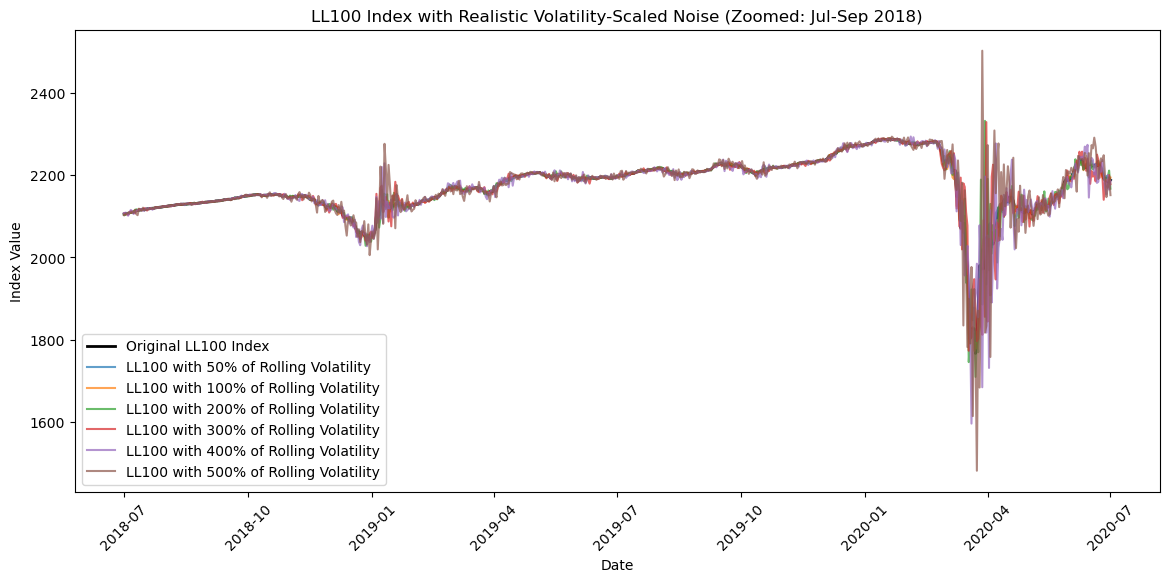

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "Project1 Data.csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date and fill missing values
df = df.sort_values('Date')
df.fillna(method='ffill', inplace=True)

# Compute daily returns
df['LL100_Return'] = df['LL100'].pct_change()

# Compute rolling volatility (standard deviation of daily returns)
df['Rolling_Volatility'] = df['LL100_Return'].rolling(window=14).std()

# Define zoom-in period
zoom_start_date = "2018-07-01"
zoom_end_date = "2020-07-01"
df_zoom = df[(df['Date'] >= zoom_start_date) & (df['Date'] <= zoom_end_date)].copy()

# Define noise scaling factors (Low, Medium, High as % of Rolling Volatility)
noise_factors = [0.5, 1.0, 2.0 , 3.0,4.0, 5.0]  # 50%, 100%, and 200% of rolling volatility

# Plot original LL100 index
plt.figure(figsize=(14, 6))
plt.plot(df_zoom['Date'], df_zoom['LL100'], label='Original LL100 Index', color='black', linewidth=2)

# Inject noise based on rolling volatility
for factor in noise_factors:
    noise = np.random.normal(0, factor * df_zoom['Rolling_Volatility'], len(df_zoom))
    noisy_series = df_zoom['LL100'] * (1 + noise)  # Apply noise as a % of the price
    plt.plot(df_zoom['Date'], noisy_series, label=f'LL100 with {factor * 100:.0f}% of Rolling Volatility', alpha=0.7)

plt.legend()
plt.title('LL100 Index with Realistic Volatility-Scaled Noise (Zoomed: Jul-Sep 2018)')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.show()


In [218]:
# Store results for different noise levels with and without volatility filter
momentum_results = []

for factor in noise_factors:
    # Generate noisy LL100 index
    noise = np.random.normal(0, factor * df['Rolling_Volatility'], len(df))
    df[f'LL100_Noisy_{factor}'] = df['LL100'] * (1 + noise)  # Apply noise as a % of the price
    
    # Compute moving averages
    df[f'LL100_Noisy_MA5_{factor}'] = df[f'LL100_Noisy_{factor}'].rolling(window=5).mean()
    
    # Define momentum strategy without volatility filter
    df[f'Momentum_Signal_No_Filter_{factor}'] = np.where(
        df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}'], 1, -1)

    # Define momentum strategy with volatility filter (only trade when above median volatility)
    low_vol_threshold = df['Rolling_Volatility'].quantile(0.25)  # 25th percentile
    high_vol_threshold = df['Rolling_Volatility'].quantile(0.75)  # 75th percentile
    vol_threshold = df['Rolling_Volatility'].median()
    df[f'Momentum_Signal_With_Filter_{factor}'] = np.where(
        (df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}']) & (df['Rolling_Volatility'] > low_vol_threshold) & (df['Rolling_Volatility'] < high_vol_threshold), 1,
        np.where((df[f'LL100_Noisy_{factor}'] < df[f'LL100_Noisy_MA5_{factor}']) & (df['Rolling_Volatility'] > low_vol_threshold) & (df['Rolling_Volatility'] < high_vol_threshold), -1, 0))

    # Compute returns
    df[f'Momentum_Returns_No_Filter_{factor}'] = df[f'Momentum_Signal_No_Filter_{factor}'].shift(1) * df['LL100_Return']
    df[f'Momentum_Returns_With_Filter_{factor}'] = df[f'Momentum_Signal_With_Filter_{factor}'].shift(1) * df['LL100_Return']

    # Compute cumulative returns
    df[f'Cumulative_No_Filter_{factor}'] = (1 + df[f'Momentum_Returns_No_Filter_{factor}']).cumprod()
    df[f'Cumulative_With_Filter_{factor}'] = (1 + df[f'Momentum_Returns_With_Filter_{factor}']).cumprod()

    # Compute risk metrics for both strategies
    for strategy, returns, cumulative in [
        (f"No Filter (Factor {factor})", f'Momentum_Returns_No_Filter_{factor}', f'Cumulative_No_Filter_{factor}'),
        (f"With Volatility Filter (Factor {factor})", f'Momentum_Returns_With_Filter_{factor}', f'Cumulative_With_Filter_{factor}')
    ]:
        max_dd = max_drawdown(df[cumulative])
        sharpe = df[returns].mean() / df[returns].std() * np.sqrt(252)
        sortino = sortino_ratio(df[returns])
        calmar = calmar_ratio(df[cumulative].iloc[-1]**(252/len(df)) - 1, max_dd)

        momentum_results.append({
            "Strategy": strategy,
            "Final Cumulative Return": df[cumulative].iloc[-1],
            "Sharpe Ratio": sharpe,
            "Sortino Ratio": sortino,
            "Calmar Ratio": calmar,
            "Max Drawdown (%)": max_dd * 100
        })

# Convert results to DataFrame
momentum_results_df = pd.DataFrame(momentum_results)
momentum_results_df


,Strategy,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,No Filter (Factor 0.5),1.951451,1.981381,0.008055,1.012882,-10.513194
1,With Volatility Filter (Factor 0.5),1.230532,5.131513,0.025904,8.694584,-0.366842
2,No Filter (Factor 1.0),1.942793,1.968174,0.008364,1.005801,-10.513194
3,With Volatility Filter (Factor 1.0),1.206860,4.608550,0.022375,8.129364,-0.355085
4,No Filter (Factor 2.0),1.778786,1.707166,0.007524,1.563415,-5.825706
5,With Volatility Filter (Factor 2.0),1.121719,2.745080,0.011124,3.307970,-0.530130
6,No Filter (Factor 3.0),1.491256,1.188777,0.005991,1.128188,-5.526500
7,With Volatility Filter (Factor 3.0),1.092889,2.110907,0.008088,2.194089,-0.616863
8,No Filter (Factor 4.0),1.245098,0.662902,0.002452,0.330577,-10.204845
9,With Volatility Filter (Factor 4.0),1.078731,1.797186,0.006764,1.406409,-0.820261


In [219]:
# Store results for different noise levels with and without ATR percentile-based volatility filter
momentum_results = []

# Define ATR percentiles for filtering
low_vol_threshold = df['Rolling_Volatility'].quantile(0.25)  # 25th percentile
high_vol_threshold = df['Rolling_Volatility'].quantile(0.75)  # 75th percentile

for factor in noise_factors:
    # Generate noisy LL100 index
    noise = np.random.normal(0, factor * df['Rolling_Volatility'], len(df))
    df[f'LL100_Noisy_{factor}'] = df['LL100'] * (1 + noise)  # Apply noise as a % of the price
    
    # Compute moving averages
    df[f'LL100_Noisy_MA5_{factor}'] = df[f'LL100_Noisy_{factor}'].rolling(window=5).mean()
    
    # Define momentum strategy without volatility filter
    df[f'Momentum_Signal_No_Filter_{factor}'] = np.where(
        df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}'], 1, -1)

    # Define momentum strategy with ATR-based volatility filter (only trade when ATR is within 25th-75th percentile)
    df[f'Momentum_Signal_With_Filter_{factor}'] = np.where(
        (df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}']) & (df['Rolling_Volatility'] > low_vol_threshold) & (df['Rolling_Volatility'] < high_vol_threshold), 1,
        np.where((df[f'LL100_Noisy_{factor}'] < df[f'LL100_Noisy_MA5_{factor}']) & (df['Rolling_Volatility'] > low_vol_threshold) & (df['Rolling_Volatility'] < high_vol_threshold), -1, 0))

    # Compute returns
    df[f'Momentum_Returns_No_Filter_{factor}'] = df[f'Momentum_Signal_No_Filter_{factor}'].shift(1) * df['LL100_Return']
    df[f'Momentum_Returns_With_Filter_{factor}'] = df[f'Momentum_Signal_With_Filter_{factor}'].shift(1) * df['LL100_Return']

    # Compute cumulative returns
    df[f'Cumulative_No_Filter_{factor}'] = (1 + df[f'Momentum_Returns_No_Filter_{factor}']).cumprod()
    df[f'Cumulative_With_Filter_{factor}'] = (1 + df[f'Momentum_Returns_With_Filter_{factor}']).cumprod()

    # Compute risk metrics for both strategies
    for strategy, returns, cumulative in [
        (f"No Filter (Factor {factor})", f'Momentum_Returns_No_Filter_{factor}', f'Cumulative_No_Filter_{factor}'),
        (f"With ATR-Based Volatility Filter (Factor {factor})", f'Momentum_Returns_With_Filter_{factor}', f'Cumulative_With_Filter_{factor}')
    ]:
        max_dd = max_drawdown(df[cumulative])
        sharpe = df[returns].mean() / df[returns].std() * np.sqrt(252)
        sortino = sortino_ratio(df[returns])
        calmar = calmar_ratio(df[cumulative].iloc[-1]**(252/len(df)) - 1, max_dd)

        momentum_results.append({
            "Strategy": strategy,
            "Final Cumulative Return": df[cumulative].iloc[-1],
            "Sharpe Ratio": sharpe,
            "Sortino Ratio": sortino,
            "Calmar Ratio": calmar,
            "Max Drawdown (%)": max_dd * 100
        })

# Convert results to DataFrame
momentum_results_df = pd.DataFrame(momentum_results)
momentum_results_df


,Strategy,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,No Filter (Factor 0.5),2.144157,2.261986,0.011000,1.973180,-6.201675
1,With ATR-Based Volatility Filter (Factor 0.5),1.223201,4.969083,0.024863,8.298244,-0.373123
2,No Filter (Factor 1.0),1.831624,1.793787,0.006467,0.742259,-12.923322
3,With ATR-Based Volatility Filter (Factor 1.0),1.199302,4.442402,0.020596,5.646216,-0.493930
4,No Filter (Factor 2.0),1.597186,1.390049,0.006054,1.184211,-6.201675
5,With ATR-Based Volatility Filter (Factor 2.0),1.157274,3.522589,0.015781,5.445046,-0.410532
6,No Filter (Factor 3.0),1.244016,0.660247,0.002566,0.322759,-10.409927
7,With ATR-Based Volatility Filter (Factor 3.0),1.102037,2.312704,0.009690,2.141136,-0.691873
8,No Filter (Factor 4.0),1.115902,0.344586,0.001202,0.118486,-14.124898
9,With ATR-Based Volatility Filter (Factor 4.0),1.057895,1.331680,0.005310,0.802762,-1.065649


In [220]:
momentum_results_df.to_clipboard()

In [221]:
# Recompute additional indicators manually without `ta` package

# Compute RSI manually
rsi_window = 14
delta = df['LL100'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Compute Bollinger Bands manually
df['LL100_MA20'] = df['LL100'].rolling(window=20).mean()
df['LL100_STD20'] = df['LL100'].rolling(window=20).std()
df['Upper_BB'] = df['LL100_MA20'] + 2 * df['LL100_STD20']
df['Lower_BB'] = df['LL100_MA20'] - 2 * df['LL100_STD20']

# Compute ADX manually (simplified using rolling std dev as a proxy for trend strength)
df['ADX'] = df['LL100'].diff().abs().rolling(window=14).mean()

# Store results for alternative filters and strategies
alternative_results = []

# Loop through different noise factors
for factor in noise_factors:
    # Generate noisy LL100 index
    noise = np.random.normal(0, factor * df['Rolling_Volatility'], len(df))
    df[f'LL100_Noisy_{factor}'] = df['LL100'] * (1 + noise)

    # Compute moving averages for noisy data
    df[f'LL100_Noisy_MA5_{factor}'] = df[f'LL100_Noisy_{factor}'].rolling(window=5).mean()

    # Strategy 1: RSI-Based Confirmation
    df[f'Momentum_Signal_RSI_{factor}'] = np.where(
        (df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}']) & (df['RSI'] > 50), 1,
        np.where((df[f'LL100_Noisy_{factor}'] < df[f'LL100_Noisy_MA5_{factor}']) & (df['RSI'] < 50), -1, 0))

    # Strategy 2: Bollinger Band Confirmation
    df[f'Momentum_Signal_BB_{factor}'] = np.where(
        (df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}']) & (df[f'LL100_Noisy_{factor}'] > df['Upper_BB']), 1,
        np.where((df[f'LL100_Noisy_{factor}'] < df[f'LL100_Noisy_MA5_{factor}']) & (df[f'LL100_Noisy_{factor}'] < df['Lower_BB']), -1, 0))

    # Strategy 3: ADX Trend Strength Filter
    df[f'Momentum_Signal_ADX_{factor}'] = np.where(
        (df[f'LL100_Noisy_{factor}'] > df[f'LL100_Noisy_MA5_{factor}']) & (df['ADX'] > 20), 1,
        np.where((df[f'LL100_Noisy_{factor}'] < df[f'LL100_Noisy_MA5_{factor}']) & (df['ADX'] > 20), -1, 0))

    # Strategy 4: Moving Average Crossover
    df[f'Momentum_Signal_Crossover_{factor}'] = np.where(
        (df[f'LL100_Noisy_MA5_{factor}'] > df['LL100_MA20']), 1,
        np.where((df[f'LL100_Noisy_MA5_{factor}'] < df['LL100_MA20']), -1, 0))

    # Compute returns for all strategies
    for strategy_name, signal_col in [
        ("RSI Confirmation", f'Momentum_Signal_RSI_{factor}'),
        ("Bollinger Band Confirmation", f'Momentum_Signal_BB_{factor}'),
        ("ADX Trend Strength", f'Momentum_Signal_ADX_{factor}'),
        ("Moving Average Crossover", f'Momentum_Signal_Crossover_{factor}')
    ]:
        df[f'{strategy_name}_Returns_{factor}'] = df[signal_col].shift(1) * df['LL100_Return']
        df[f'{strategy_name}_Cumulative_{factor}'] = (1 + df[f'{strategy_name}_Returns_{factor}']).cumprod()

        # Compute risk metrics
        max_dd = max_drawdown(df[f'{strategy_name}_Cumulative_{factor}'])
        sharpe = df[f'{strategy_name}_Returns_{factor}'].mean() / df[f'{strategy_name}_Returns_{factor}'].std() * np.sqrt(252)
        sortino = sortino_ratio(df[f'{strategy_name}_Returns_{factor}'])
        calmar = calmar_ratio(df[f'{strategy_name}_Cumulative_{factor}'].iloc[-1]**(252/len(df)) - 1, max_dd)

        # Store results
        alternative_results.append({
            "Strategy": strategy_name,
            "Noise Factor": factor,
            "Final Cumulative Return": df[f'{strategy_name}_Cumulative_{factor}'].iloc[-1],
            "Sharpe Ratio": sharpe,
            "Sortino Ratio": sortino,
            "Calmar Ratio": calmar,
            "Max Drawdown (%)": max_dd * 100
        })

# Convert results to DataFrame
alternative_results_df = pd.DataFrame(alternative_results)

alternative_results_df


C:\Users\zcz20\AppData\Local\Temp\ipykernel_41764\3132874304.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{strategy_name}_Returns_{factor}'] = df[signal_col].shift(1) * df['LL100_Return']
C:\Users\zcz20\AppData\Local\Temp\ipykernel_41764\3132874304.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{strategy_name}_Cumulative_{factor}'] = (1 + df[f'{strategy_name}_Returns_{factor}']).cumprod()
C:\Users\zcz20\AppData\Local\Temp\ipykernel_41764\3132874304.py:59: PerformanceWarning: DataFrame is highly fragmented

,Strategy,Noise Factor,Final Cumulative Return,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Max Drawdown (%)
0,RSI Confirmation,0.5,1.815035,2.029425,0.006858,1.109514,-8.509710
1,Bollinger Band Confirmation,0.5,1.304153,1.302767,0.004620,3.095830,-1.324702
2,ADX Trend Strength,0.5,1.117474,0.414057,0.000337,0.273358,-6.201675
3,Moving Average Crossover,0.5,1.635608,1.461184,0.005517,0.686005,-11.269588
4,RSI Confirmation,1.0,1.722321,1.970074,0.006534,1.382946,-6.201675
5,Bollinger Band Confirmation,1.0,1.292387,1.290413,0.004603,2.988111,-1.324702
6,ADX Trend Strength,1.0,1.176121,0.595239,0.000414,0.400801,-6.201675
7,Moving Average Crossover,1.0,1.628856,1.449017,0.005466,0.680022,-11.269588
8,RSI Confirmation,2.0,1.581839,1.737071,0.005024,0.765472,-9.389416
9,Bollinger Band Confirmation,2.0,1.133775,0.753668,0.000887,0.268683,-7.140118


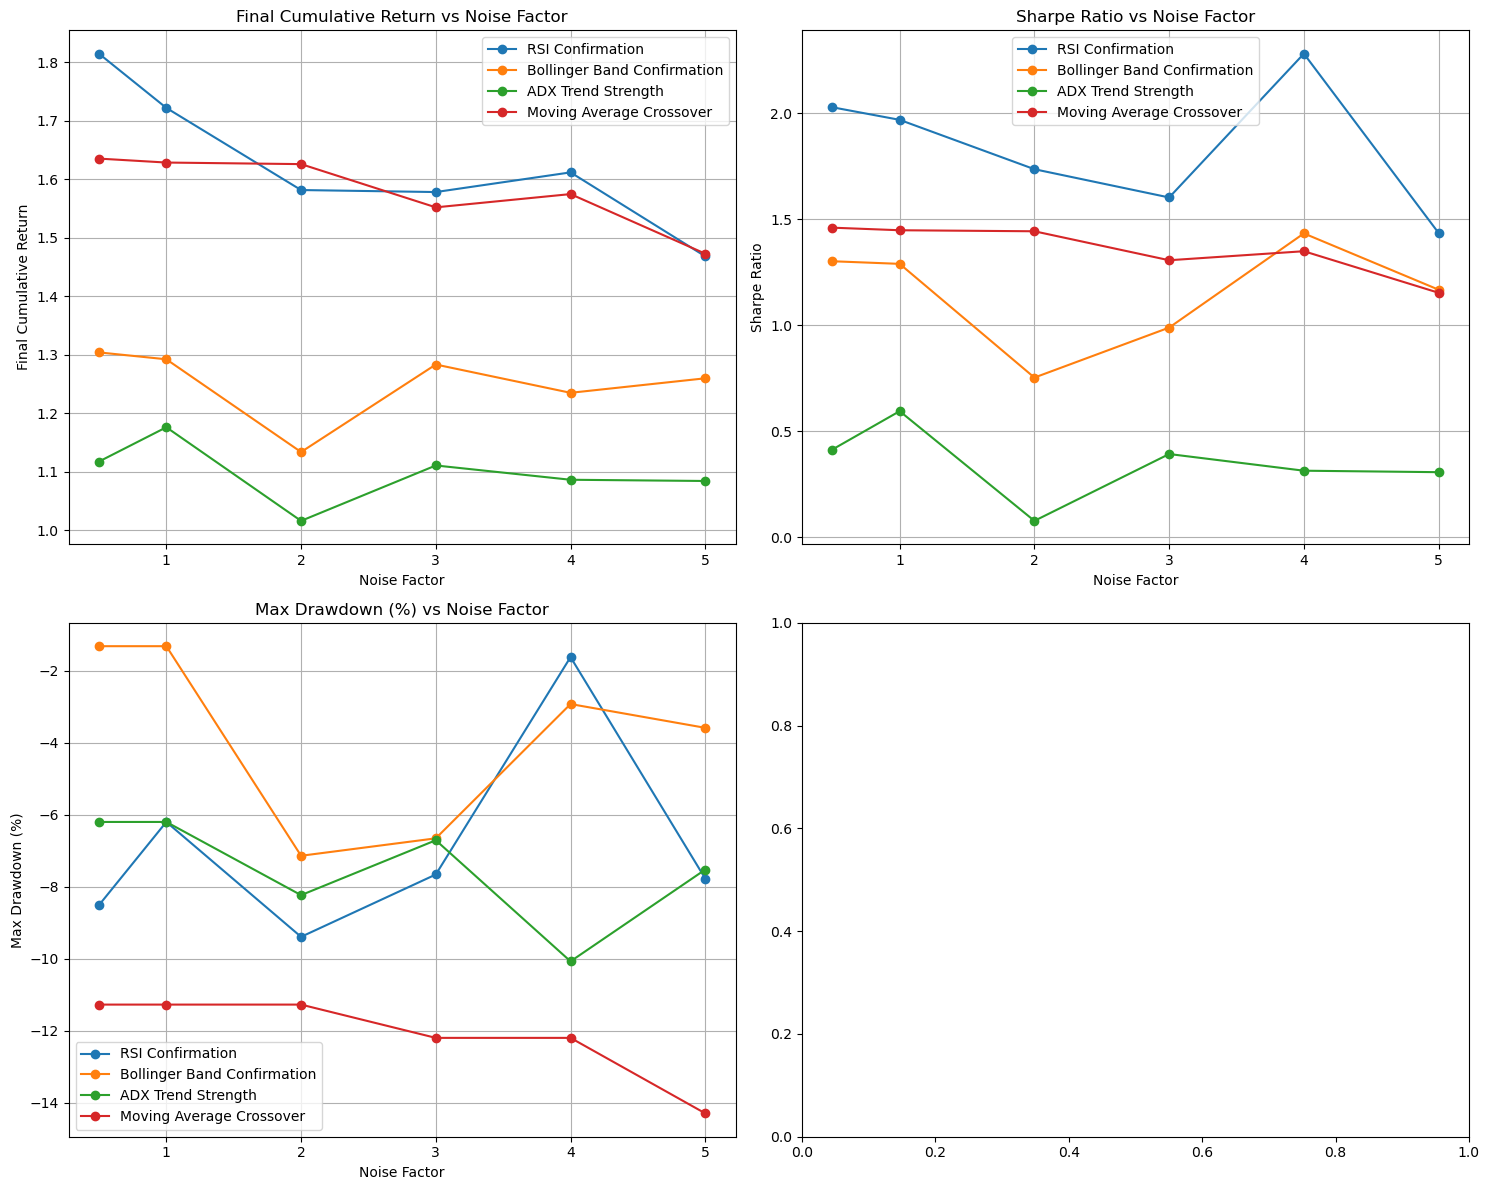

In [226]:
import matplotlib.pyplot as plt

# Extract unique strategies and noise factors
strategies = alternative_results_df["Strategy"].unique()
noise_factors = alternative_results_df["Noise Factor"].unique()

# Define metrics to plot
metrics = ["Final Cumulative Return", "Sharpe Ratio",  "Max Drawdown (%)"]

# Create subplots for each metric vs noise factor
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array to make iteration easier


# Iterate through each metric and plot it on a separate subplot
for i, metric in enumerate(metrics):
    ax = axes[i]
    for strategy in strategies:
        strategy_df = alternative_results_df[alternative_results_df["Strategy"] == strategy]
        ax.plot(strategy_df["Noise Factor"], strategy_df[metric], marker="o", linestyle="-", label=strategy)

    ax.set_title(f"{metric} vs Noise Factor")
    ax.set_xlabel("Noise Factor")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()



In [222]:
alternative_results_df.to_clipboard()

Advantages of Momentum Strategies
1. Captures Strong Trends Efficiently
Momentum strategies perform well in trending markets where price movements persist in one direction.
Advantage: Helps capture large price swings and sustained market movements.
2. Simple & Computationally Efficient
Momentum trading relies on basic technical indicators (e.g., Moving Averages, RSI, MACD).
Advantage: Easy to implement, low computation cost, and doesn’t require deep learning or complex models.
3. Adapts to Market Regimes
Can work in bullish and bearish markets as long as trends exist.
Advantage: Can be long or short, profiting from upward and downward movements.
4. Can Be Combined With Other Indicators
Works well when paired with filters like RSI, Bollinger Bands, or volatility measures.
Advantage: Helps refine trade entries/exits and reduce whipsaws.


Disadvantages of Momentum Strategies
1. Fails in Choppy/Sideways Markets (Whipsaws)
Momentum indicators struggle in range-bound (sideways) markets, generating false buy/sell signals.
Example: If prices oscillate around the moving average, momentum strategies will enter and exit repeatedly, causing losses.
2. Lagging Indicator Issue
Moving averages and trend-following signals are reactive, not predictive.
Problem: The strategy enters late (after the trend starts) and exits late (after the reversal), losing part of the move.
3. High Transaction Costs in Volatile Markets
Frequent trading = higher slippage and commission fees, reducing net profits.
Problem: Markets with erratic short-term movements (high volatility) can generate many unnecessary trades.
4. Vulnerable to Market Shocks & News Events
Momentum strategies don’t consider fundamentals, so they can be easily disrupted by sudden news (e.g., economic reports, Fed decisions).
Example: A stock may have strong momentum but crash due to bad earnings, making technical signals useless.

### When Momentum Strategies Will Fail on Our Data
## If Market Becomes Sideways/Choppy

If LL100 enters a prolonged consolidation period, momentum trading will generate false signals.
Proof: Volatility filtering didn’t help much, suggesting we might already be trading in mixed conditions.


## If We Add More Short-Term Noise

High-frequency, mean-reverting behavior (where price frequently reverts to the mean) hurts momentum.
Example: If LL100 movements are driven by liquidity arbitrage rather than trends, momentum won’t work.

## If We Include Fundamental Market Events

Macroeconomic shocks invalidate technical signals.
If the LL100 index is fundamentally linked to economic data, momentum signals may not reflect true market forces.